## Observations and Insights 

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [163]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [164]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 


dup_mouse = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mask = merge_df["Mouse ID"] != "g989"
new_df = merge_df.loc[mask].reset_index(drop=True)
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [166]:
# Checking the number of mice in the clean DataFrame.
number_mouse = new_df["Mouse ID"].nunique()
number_mouse

248

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = new_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_mean

tumor_median = new_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_median

tumor_var = new_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_var

tumor_std = new_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_std

tumor_sem = new_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_sem



#summary dataframe
tumor_sum = pd.DataFrame({
    "Mean":tumor_mean,
    "Median":tumor_median,
    "Variance":tumor_var,
    "Standard Deviation":tumor_std, 
    "SEM":tumor_sem, 
})

#Display
tumor_sum

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

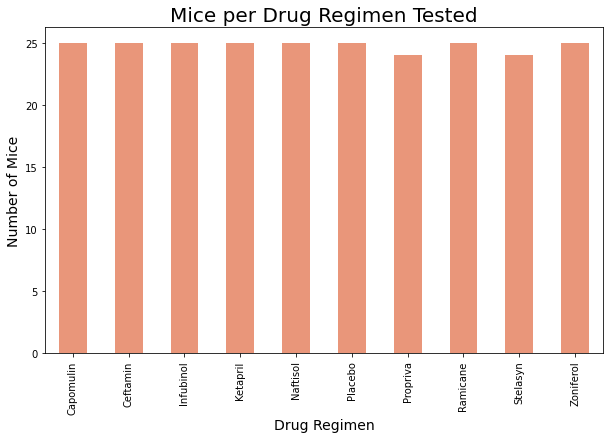

In [169]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Filter the DataFrame down only to those columns to chart
pandas_mouse = new_df.groupby('Drug Regimen')['Mouse ID'].nunique()
pandas_mouse 

pandas_mouse.plot(kind="bar", figsize=(10,6), facecolor = "darksalmon")
plt.title('Mice per Drug Regimen Tested', fontsize=20)
plt.ylabel('Number of Mice', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=14)
plt.show()



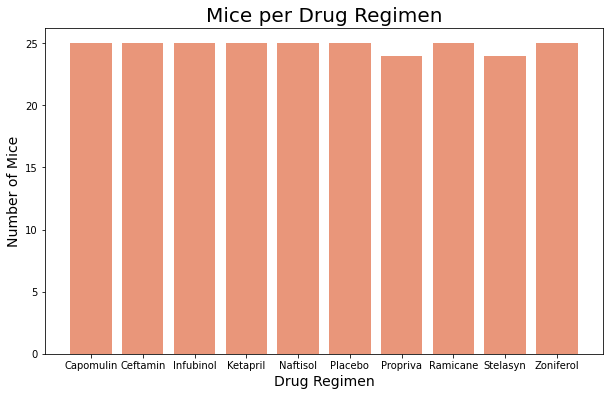

In [170]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

pyplot_mouse = new_df.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()
pyplot_mouse.rename(columns={"Mouse ID": "Mouse_Count"}, inplace=True)
pyplot_mouse 

plt.figure(figsize=(10,6))
plt.bar(panda_mouse["Drug Regimen"], panda_mouse.Mouse_Count, color="darksalmon")

plt.title("Mice per Drug Regimen", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)

plt.show()

<Figure size 720x432 with 0 Axes>

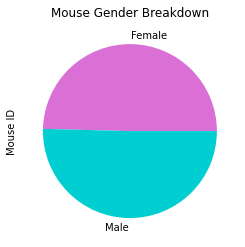

<Figure size 720x432 with 0 Axes>

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["orchid", "darkturquoise"]
pandas_pie= new_df.groupby('Sex').nunique()['Mouse ID']
pandas_pie.plot.pie(title="Mouse Gender Breakdown", colors=colors)
plt.figure(figsize=(10,6))

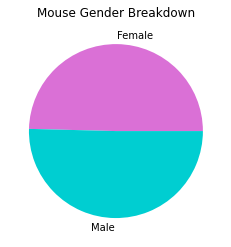

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_pie = new_df.groupby("Sex").nunique()["Mouse ID"]
pyplot_pie_df=pd.DataFrame(pyplot_pie)
plt.pie(pyplot_pie, colors=colors, labels=pyplot_pie.index)
plt.title("Mouse Gender Breakdown")
plt.show()
plt.figure(figsize=(10,6))

## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint= new_df.groupby(["Mouse ID", "Drug Regimen"]).max()["Timepoint"]
timepoint_df=pd.DataFrame(timepoint)
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_merge = pd.merge(timepoint_df, new_df, on=('Mouse ID','Timepoint'))
new_merge

mask = [True if x in ["Capomulin", "Ramicane", "Infubinol","Ceftamin"] else False for x in new_merge["Drug Regimen"]]
new_merge.loc[mask]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [174]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
#Get just tumor volume for Capomulin
capomulin = new_merge.loc[new_merge["Drug Regimen"]=="Capomulin"]
capo_tum_volm=capomulin['Tumor Volume (mm3)']
capo_tum_volm

#Calculate quartiles, IQR & Boundaries for Capomulin
capo_quart=capo_tum_volm.quantile([.25,.5,.75])
lower_capo=capo_quart[.25]
ave_capo=capo_quart[.5]
upper_capo=capo_quart[.75]
capo_iqr =upper_capo-lower_capo
capo_lower_bound=lower_capo-(1.5*capo_iqr)
capo_upper_bound=upper_capo+(1.5*capo_iqr)

print("Drug: Capomulin")
print(f"The lower quartile of tumor volume for Capomulin is: {lower_capo}")
print(f"The upper quartile of tumor volume for Capomulin is: {upper_capo}")
print(f"The interquartile range of tumor volume for Capomulin is: {capo_iqr}")
print(f"The the median of tumor volume for Capomulin is: {ave_capo} ")
print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.\n")


#Get just tumor volume for Ramicane
ramicane = new_merge.loc[new_merge["Drug Regimen"]=="Ramicane"]
rami_tum_volm=ramicane['Tumor Volume (mm3)']
rami_tum_volm

#Calculate quartiles, IQR & Boundaries for Ramicane
rami_quart=rami_tum_volm.quantile([.25,.5,.75])
lower_rami=rami_quart[.25]
ave_rami=rami_quart[.5]
upper_rami=rami_quart[.75]
rami_iqr =upper_rami-lower_rami
rami_lower_bound=lower_rami-(1.5*rami_iqr)
rami_upper_bound=upper_rami+(1.5*rami_iqr)

print("Drug: Ramicane")
print(f"The lower quartile of tumor volume for Ramicane is: {lower_rami}")
print(f"The upper quartile of tumor volume for Ramicane is: {upper_rami}")
print(f"The interquartile range of tumor volume for Ramicane is: {rami_iqr}")
print(f"The the median of tumor volume for Ramicane is: {ave_rami} ")
print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.\n")


#Get just tumor volume for Infubinol
infubinol = new_merge.loc[new_merge["Drug Regimen"]=="Infubinol"]
inf_tum_volm=infubinol['Tumor Volume (mm3)']
inf_tum_volm

#Calculate quartiles, IQR & Boundaries for Infubinol
inf_quart=inf_tum_volm.quantile([.25,.5,.75])
lower_inf=inf_quart[.25]
ave_inf=inf_quart[.5]
upper_inf=inf_quart[.75]
inf_iqr =upper_inf-lower_inf
inf_lower_bound=lower_inf-(1.5*inf_iqr)
inf_upper_bound=upper_inf+(1.5*inf_iqr)

print("Drug: Infubinol")
print(f"The lower quartile of tumor volume for Infubinol is: {lower_inf}")
print(f"The upper quartile of tumor volume for Infubinol is: {upper_inf}")
print(f"The interquartile range of tumor volume for Infubinol is: {inf_iqr}")
print(f"The the median of tumor volume for Infubinol is: {ave_inf} ")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.\n")


#Get just tumor volume for Ceftamin
ceftamin = new_merge.loc[new_merge["Drug Regimen"]=="Ceftamin"]
ceft_tum_volm=ceftamin['Tumor Volume (mm3)']
ceft_tum_volm

#Calculate quartiles, IQR & Boundaries for Ceftamin
ceft_quart=ceft_tum_volm.quantile([.25,.5,.75])
lower_ceft=ceft_quart[.25]
ave_ceft=ceft_quart[.5]
upper_ceft=ceft_quart[.75]
ceft_iqr =upper_ceft-lower_ceft
ceft_lower_bound=lower_ceft-(1.5*ceft_iqr)
ceft_upper_bound=upper_ceft+(1.5*ceft_iqr)

print("Drug: Ceftamin")
print(f"The lower quartile of tumor volume for Ceftamin is: {lower_ceft}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upper_ceft}")
print(f"The interquartile range of tumor volume for Ceftamin is: {ceft_iqr}")
print(f"The the median of tumor volume for Ceftamin is: {ave_ceft} ")
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.\n")



Drug: Capomulin
The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
The the median of tumor volume for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Drug: Ramicane
The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The the median of tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Drug: Infubinol
The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
The the median of tumor v

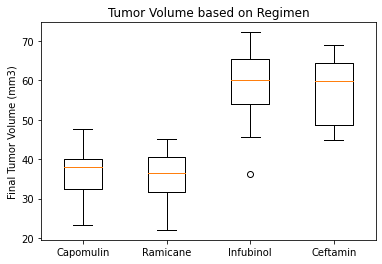

In [175]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume based on Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capo_tum_volm, rami_tum_volm, inf_tum_volm, ceft_tum_volm])
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


In [191]:
ramicane

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
12,a644,45,Ramicane,Female,7,17,32.978522,1
33,c458,30,Ramicane,Female,23,20,38.342008,2
37,c758,45,Ramicane,Male,9,17,33.397653,1
45,d251,45,Ramicane,Female,8,19,37.311236,2
52,e662,45,Ramicane,Male,8,24,40.659006,2
70,g791,45,Ramicane,Male,11,16,29.128472,1
76,i177,45,Ramicane,Male,10,18,33.562402,3


## Line and Scatter Plots

<Figure size 720x432 with 0 Axes>

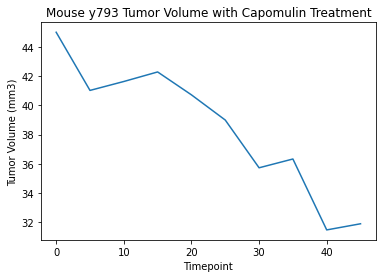

<Figure size 720x432 with 0 Axes>

In [177]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_y793=new_df.loc[new_df["Mouse ID"]=="y793"]
mouse_y793
timepoint=mouse_y793["Timepoint"]
tumorvolume=mouse_y793["Tumor Volume (mm3)"]

plt.plot(timepoint, tumorvolume)
plt.title("Mouse y793 Tumor Volume with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

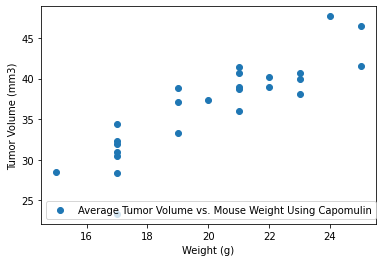

<Figure size 720x432 with 0 Axes>

In [178]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = capomulin["Weight (g)"]
tumor_volume = capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume, label ="Average Tumor Volume vs. Mouse Weight Using Capomulin" )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.figure(figsize=(10,6))

## Correlation and Regression

The r-value is: 0.8767060403658119
The r-squared value is: 0.7686134812139006


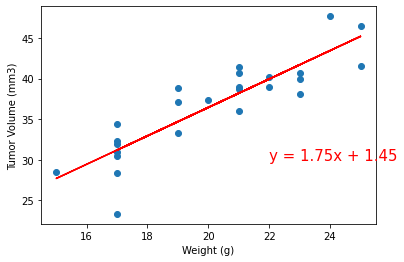

In [183]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


mouse_weight = capomulin["Weight (g)"]
tumor_volume = capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume, label ="Average Tumor Volume vs. Mouse Weight Using Capomulin" )
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(22,30),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()


